In [1]:
%pwd

'/Users/carlshen/GitHub/pydata-book'

In [2]:
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [3]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [5]:
import json
records = [json.loads(line) for line in open(path)]

In [9]:
records[0]['tz']

'America/New_York'

**If we are unsure whether the interested column has N/A value, use this way to get meaningful result:**

In [7]:
time_zones = [record['tz'] for record in records if 'tz' in record]

In [8]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

## Native Python way to produce counts by time zone:

In [11]:
def get_counts(seq):
    counts = {}
    for x in seq:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

print(get_counts(time_zones))

{'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax': 4, 'America/Edmonton': 6,

In [13]:
# Alternativly, we can also use `defaultdict` for a better usage

from collections import defaultdict

def get_counts2(seq):
    counts = defaultdict(int)
    for x in seq:
        counts[x] += 1
    return counts

print(get_counts2(time_zones))

defaultdict(<class 'int'>, {'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax'

**Get top 10 time zones the their counts**

In [15]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

count_dict = get_counts2(time_zones)
top_counts(count_dict)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

Use `Counter` to simplify the program

In [16]:
from collections import Counter

Counter(time_zones).most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## See how to achieve same goal in Pandas

In [17]:
import pandas as pd
from pandas import DataFrame, Series

df = DataFrame(records)
print(df)

       _heartbeat_                                                  a  \
0              NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
1              NaN                             GoogleMaps/RochesterNY   
2              NaN  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   
3              NaN  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...   
4              NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
5              NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
6              NaN  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...   
7              NaN  Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...   
8              NaN  Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...   
9              NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
10             NaN  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...   
11             NaN  Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...   
12             NaN  Mozilla/5.0 (Windows NT 6.1; WO

In [20]:
tz_counts = df['tz'].value_counts()

In [21]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [22]:
clean_tz = df['tz'].fillna('missing')

In [23]:
clean_tz[clean_tz == ''] = 'Unknown'

In [25]:
tz_counts = clean_tz.value_counts()
print(tz_counts)

America/New_York                  1251
Unknown                            521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
missing                            120
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Phoenix                     20
America/Indianapolis                20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Paris                        14
Europe/Stockholm                    14
America/Vancouver                   12
Pacific/Auckland                    11
Europe/Prague                       10
Europe/Oslo                         10
Asia/Hong_Kong           

In [26]:
%matplotlib inline
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)

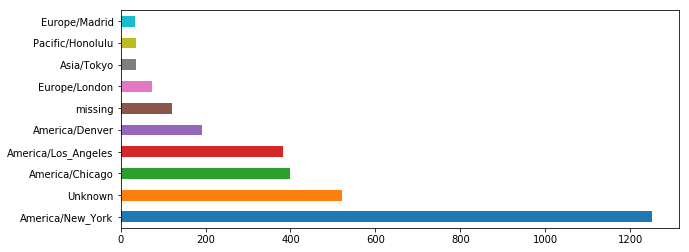

In [28]:
plt.figure(figsize=(10, 4))
tz_counts[:10].plot(kind='barh', rot=0)

In [29]:
df.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [30]:
df['a'][0]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11'

In [31]:
df['a'][1]

'GoogleMaps/RochesterNY'

In [32]:
df['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [33]:
df.a

0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                  GoogleMaps/RochesterNY
2       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6       Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7       Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8       Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
10      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
11      Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...
12      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
13                                                    NaN
14      Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...
15      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
16      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
17      Mozill

In [37]:
results = Series([x.split()[0] for x in df.a.dropna()])
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

## MovieLens 1M data set

In [55]:
import pandas as pd
import os
encoding = 'latin1'

users_path = os.path.expanduser('ch02/movielens/users.dat')
ratings_path = os.path.expanduser('ch02/movielens/ratings.dat')
movies_mpath = os.path.expanduser('ch02/movielens/movies.dat')

In [57]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv(users_path, sep='::', header=None, names=unames, encoding=encoding,engine='python')
users[:10]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [58]:
rnames = ['user_id', 'movie_id', 'rating', 'ts']
ratings = pd.read_csv(ratings_path, sep='::', header=None, names=rnames, encoding=encoding, engine='python')
ratings[:10]

,user_id,movie_id,rating,ts
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [60]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv(movies_mpath, sep='::', header=None, names=mnames, encoding=encoding, engine='python')
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [61]:
data = pd.merge(pd.merge(users, ratings), movies)

In [62]:
data?

In [63]:
data[:10]

,user_id,gender,age,occupation,zip,movie_id,rating,ts,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,F,18,3,95825,1193,4,978156168,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,M,1,10,48073,1193,5,982730936,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,F,25,7,10023,1193,5,978136709,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,F,25,1,14607,1193,3,978125194,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,M,45,3,55421,1193,5,978557765,One Flew Over the Cuckoo's Nest (1975),Drama


In [68]:
data.ix[0]

user_id                                            1
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
movie_id                                        1193
rating                                             5
ts                                         978300760
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [75]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [77]:
ratings_by_title = data.groupby('title').size()
print(ratings_by_title)

title
$1,000,000 Duck (1971)                              37
'Night Mother (1986)                                70
'Til There Was You (1997)                           52
'burbs, The (1989)                                 303
...And Justice for All (1979)                      199
1-900 (1994)                                         2
10 Things I Hate About You (1999)                  700
101 Dalmatians (1961)                              565
101 Dalmatians (1996)                              364
12 Angry Men (1957)                                616
13th Warrior, The (1999)                           750
187 (1997)                                          55
2 Days in the Valley (1996)                        286
20 Dates (1998)                                    139
20,000 Leagues Under the Sea (1954)                575
200 Cigarettes (1999)                              181
2001: A Space Odyssey (1968)                      1716
2010 (1984)                                        470
24 7

In [78]:
ratings_by_title?